In [3]:
# –ò–º–ø–æ—Ä—Ç –±–∏–±–ª–∏–æ—Ç–µ–∫
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor, Pool, cv
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, r2_score, mean_absolute_error, mean_squared_error
import optuna
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.preprocessing import PolynomialFeatures
import plotly.express as px
import optuna

# –£—Å—Ç–∞–Ω–æ–≤–∫–∞ –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –æ—Ç–æ–±—Ä–∞–∂–∞–µ–º—ã—Ö —Å—Ç—Ä–æ–∫ –∏ —Å—Ç–æ–ª–±—Ü–æ–≤

pd.set_option('display.max_columns', None)  # –ü–æ–∫–∞–∑–∞—Ç—å –≤—Å–µ —Å—Ç–æ–ª–±—Ü—ã




In [ ]:
#  –ó–∞–≥—Ä—É–∑–∫–∞ –¥–∞–Ω–Ω—ã—Ö
df = pd.read_csv(r"data\avito_clean_final.csv")  

#  –¶–µ–ª–µ–≤–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è
TARGET = "–¶–µ–Ω–∞"

#  –ü—Ä–∏–∑–Ω–∞–∫–∏
features = df.drop(columns=[TARGET]).columns.tolist()
cat_features = df[features].select_dtypes(include=["object", "category"]).columns.tolist()

# –†–∞–Ω–¥–æ–º —Å—Ç–µ–π—Ç 
random_state=42

model_results = []



In [5]:
def fit_and_save_model_results(model, model_name, df, log_target=False):
    """
    –û–±—É—á–∞–µ—Ç –º–æ–¥–µ–ª—å, –≤—ã—á–∏—Å–ª—è–µ—Ç –º–µ—Ç—Ä–∏–∫–∏ –∏ —Å–æ—Ö—Ä–∞–Ω—è–µ—Ç —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã
    
    –ü–∞—Ä–∞–º–µ—Ç—Ä—ã:
    model - –º–æ–¥–µ–ª—å –¥–ª—è –æ–±—É—á–µ–Ω–∏—è
    model_name - –Ω–∞–∑–≤–∞–Ω–∏–µ –º–æ–¥–µ–ª–∏ (–¥–ª—è —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∏—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤)
    X_train - –ø—Ä–∏–∑–Ω–∞–∫–∏ –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–∏
    y_train - —Ü–µ–ª–µ–≤–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–∏
    X_test - –ø—Ä–∏–∑–Ω–∞–∫–∏ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∏ (–¥–ª—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è)
    y_test - —Ü–µ–ª–µ–≤–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∏ (–¥–ª—è –æ—Ü–µ–Ω–∫–∏)
    log_target - –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –ª–∏ –ª–æ–≥–∞—Ä–∏—Ñ–º–∏—Ä–æ–≤–∞–Ω–∏–µ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π
    """
    # –ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—è —Å–ø–∏—Å–∫–∞ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤, –µ—Å–ª–∏ –æ–Ω –Ω–µ —Å—É—â–µ—Å—Ç–≤—É–µ—Ç
    if 'model_results' not in globals():
        global model_results
        model_results = []

        #  –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –Ω–∞ train / test
    X_train, X_test, y_train, y_test = train_test_split(
        df[features], df[TARGET], test_size=0.2, random_state=random_state
    )
    
    if log_target:
        # –õ–æ–≥–∞—Ä–∏—Ñ–º–∏—Ä–æ–≤–∞–Ω–∏–µ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π
        log_y_train = np.log1p(y_train)
        model.fit(X_train, log_y_train)
        log_y_pred = model.predict(X_test)  
        y_pred = np.expm1(log_y_pred)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)  
    
    # –í—ã—á–∏—Å–ª–µ–Ω–∏–µ –º–µ—Ç—Ä–∏–∫
    mae = mean_absolute_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / np.clip(y_test, 1e-6, None))) * 100  # –ó–∞—â–∏—Ç–∞ –æ—Ç –¥–µ–ª–µ–Ω–∏—è –Ω–∞ 0
    
    # –í—ã–≤–æ–¥ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤
    print(f'\nModel: {model_name}')
    print(f'Mean Absolute Error (MAE): {mae:.2f}')
    print(f'R-squared (R^2): {r2:.4f}')
    print(f'RMSE: {rmse:.2f}')

    # –°–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤
    model_results.append({
        'model_name': model_name,
        'MAE': mae,
        'R2': r2,
        'RMSE': rmse,

    })



In [6]:
def feature_importance_plot(feature_inportance):
    """
    –°–æ–∑–¥–∞–µ—Ç –≥–æ—Ä–∏–∑–æ–Ω—Ç–∞–ª—å–Ω—É—é —Å—Ç–æ–ª–±—á–∞—Ç—É—é –¥–∏–∞–≥—Ä–∞–º–º—É, –æ—Ç–æ–±—Ä–∞–∂–∞—é—â—É—é –≤–∞–∂–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –∏–∑ –º–æ–¥–µ–ª–∏ CatBoost.
    
    –ü–∞—Ä–∞–º–µ—Ç—Ä—ã:
    -----------
    feature_importance : pandas.DataFrame
        –î–∞—Ç–∞—Ñ—Ä–µ–π–º, —Å–æ–¥–µ—Ä–∂–∞—â–∏–π –∑–Ω–∞—á–µ–Ω–∏—è –≤–∞–∂–Ω–æ—Å—Ç–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ —Å –¥–≤—É–º—è –∫–æ–ª–æ–Ω–∫–∞–º–∏:
        - 'Feature Id': str - –Ω–∞–∑–≤–∞–Ω–∏—è –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
        - 'Importances': float - –∑–Ω–∞—á–µ–Ω–∏—è –≤–∞–∂–Ω–æ—Å—Ç–∏ –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞
        
    –í–æ–∑–≤—Ä–∞—â–∞–µ—Ç:

        –û—Ç–æ–±—Ä–∞–∂–∞–µ—Ç –∏–Ω—Ç–µ—Ä–∞–∫—Ç–∏–≤–Ω—ã–π –≥—Ä–∞—Ñ–∏–∫ plotly, –Ω–æ –Ω–µ –≤–æ–∑–≤—Ä–∞—â–∞–µ—Ç –∑–Ω–∞—á–µ–Ω–∏–µ   
    """
    fig = px.bar(
        feature_inportance.sort_values("Importances", ascending=True),  # –ø–µ—Ä–µ–≤–µ—Ä–Ω—ë–º –¥–ª—è –≥–æ—Ä–∏–∑–æ–Ω—Ç–∞–ª—å–Ω–æ–≥–æ –≥—Ä–∞—Ñ–∏–∫–∞
        x="Importances",
        y="Feature Id",
        orientation="h",
        title=" –í–∞–∂–Ω–µ–π—à–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ (–±–µ–π–∑–ª–∞–π–Ω CatBoost)",
    )

    fig.update_layout(
        xaxis_title="–í–ª–∏—è–Ω–∏–µ",
        yaxis_title="–ü—Ä–∏–∑–Ω–∞–∫",
        height=800
    )

    fig.show()

In [7]:
#  –ë–µ–π–∑–ª–∞–π–Ω-–º–æ–¥–µ–ª—å —Å –¥–µ—Ñ–æ–ª—Ç–Ω—ã–º–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏
baseline_model = CatBoostRegressor(
    verbose=0,
    random_state=random_state,
    cat_features=cat_features
)
fit_and_save_model_results(model = baseline_model, model_name='–ë–µ–π–∑–ª–∞–π–Ω', df=df)


Model: –ë–µ–π–∑–ª–∞–π–Ω
Mean Absolute Error (MAE): 2393178.00
R-squared (R^2): 0.8487
RMSE: 3490289.69


In [8]:
# –í–∞–∂–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –æ—Ç –±–µ–π–∑–ª–∞–π–Ω-–º–æ–¥–µ–ª–∏
base_importances = baseline_model.get_feature_importance(prettified=True)
top_base = base_importances.sort_values("Importances", ascending=False)
feature_importance_plot(top_base)

## –û—Ç–±–æ—Ä –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
–ó–Ω–∞—á–µ–Ω–∏–µ –º–µ–Ω–µ–µ 0.5 –∏–º–µ—é—Ç –ø—Ä–∏–∑–Ω–∞–∫–∏: –ü–∞—Å—Å–∞–∂–∏—Ä—Å–∫–∏–π –ª–∏—Ñ—Ç, –ï—Å—Ç—å –º—É—Å–æ—Ä–æ–ø—Ä–æ–≤–æ–¥, –ï—Å—Ç—å –∫–æ–Ω—Å—å–µ—Ä–∂, –°–ø–æ—Ä—Ç –ø–ª–æ—â–∞–¥–∫–∞,–î–µ—Ç—Å–∫–∞—è –ø–ª–æ—â–∞–¥–∫–∞,–ï—Å—Ç—å –≥–∞–∑. –ò—Ö –∏–Ω—Ñ–æ—Ä–º–∞—Ç–∏–≤–Ω–æ—Å—Ç—å –Ω–∏–∑–∫–∞—è, –Ω–æ –ø–æ—Å–∫–æ–ª—å–∫—É —ç—Ç–æ dummy –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ –∏ —á–∞—Å—Ç—å –∏—Ö –∑–Ω–∞—á–µ–Ω–∏–π –≤–Ω–æ—Å–∏—Ç –±–æ–ª—å—à–∏–π –≤–∫–ª–∞–¥ –≤ –º–æ–¥–µ–ª—å —É–¥–∞–ª–∏—Ç—å –∏—Ö –Ω–µ–ª—å–∑—è(–∏–Ω—Ñ–æ—Ä–º–∞—Ç–∏–≤–Ω–æ—Å—Ç—å –ø–æ –¥–∞–Ω–Ω—ã–º –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–º —Ä–∞–∑–º—ã—Ç–∞ –≤ –º–æ–¥–µ–ª–∏ –∏ –¥–æ–ª–∂–Ω–∞ –±—ã—Ç—å –æ—Ü–µ–Ω–µ–Ω–∞ –≤ –Ω–∞–∫–æ–ø–ª–µ–Ω–Ω–æ–º  –∑–Ω–∞—á–µ–Ω–∏–∏) 

In [9]:
model_with_log= CatBoostRegressor(
    verbose=0,
    random_state=random_state,
    cat_features=cat_features
)
fit_and_save_model_results(model = model_with_log, model_name='–ë–µ–π–∑–ª–∞–π–Ω —Å –ª–æ–≥–∞—Ä–∏—Ñ–º–∏—Ä–æ–≤–∞–Ω–∏–µ–º', df=df, log_target=True)


Model: –ë–µ–π–∑–ª–∞–π–Ω —Å –ª–æ–≥–∞—Ä–∏—Ñ–º–∏—Ä–æ–≤–∞–Ω–∏–µ–º
Mean Absolute Error (MAE): 2326205.42
R-squared (R^2): 0.8441
RMSE: 3543010.24


# –ü—Ä–∏ –ª–æ–≥–∞—Ä–∏—Ñ–º–∏—Ä–æ–≤–∞–Ω–∏–∏ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π –ø—Ä–æ–∏–∑–æ—à–ª–æ —É—Ö—É–¥—à–µ–Ω–∏–µ –º–µ—Ç—Ä–∏–∫ R^2 –∏ RMSE, –ø–æ—ç—Ç–æ–ºe –ø—Ä–∏ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–∏ Optuna –≤–æ–∑—å–º–µ–º –æ–±—á–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π

In [10]:
# –í–∞–∂–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –æ—Ç log-–º–æ–¥–µ–ª–∏
log_importances = model_with_log.get_feature_importance(prettified=True)
top_log = log_importances.sort_values("Importances", ascending=False)
feature_importance_plot(top_log)

### –ö—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏—è –≤–Ω—É—Ç—Ä–∏ CatBoost

–î–ª—è –ø–æ–¥–±–æ—Ä–∞ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è –≤—Å—Ç—Ä–æ–µ–Ω–Ω–∞—è —Ñ—É–Ω–∫—Ü–∏—è `catboost.cv()`, 
–∫–æ—Ç–æ—Ä–∞—è –ø—Ä–æ–≤–æ–¥–∏—Ç K-—Ñ–æ–ª–¥–æ–≤—É—é –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏—é (–≤ –¥–∞–Ω–Ω–æ–º —Å–ª—É—á–∞–µ 3-fold). 
–≠—Ç–æ –ø–æ–∑–≤–æ–ª—è–µ—Ç –ø–æ–ª—É—á–∞—Ç—å —É—Å—Ç–æ–π—á–∏–≤—É—é –º–µ—Ç—Ä–∏–∫—É RMSE –∏ —Å–Ω–∏–∂–∞–µ—Ç —Ä–∏—Å–∫ –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏—è –ø—Ä–∏ –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–∏.


[I 2025-08-03 15:24:05,847] A new study created in memory with name: Cat_boost_optuna


Training on fold [0/3]
Training on fold [0/3]
Training on fold [0/3]


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/3]


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/3]
Training on fold [0/3]
Training on fold [0/3]


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/3]

bestTest = 4340638.111
bestIteration = 51

Training on fold [1/3]

bestTest = 4073139.688
bestIteration = 103

Training on fold [1/3]

bestTest = 3904220.384
bestIteration = 187

Training on fold [1/3]

bestTest = 3581005.598
bestIteration = 83

Training on fold [2/3]

bestTest = 3483364.421
bestIteration = 152

Training on fold [2/3]

bestTest = 3668094.733
bestIteration = 162

Training on fold [2/3]


[I 2025-08-03 15:24:49,875] Trial 4 finished with value: 3794027.483639628 and parameters: {'iterations': 689, 'depth': 5, 'learning_rate': 0.29926151408646895, 'l2_leaf_reg': 3.100248389909951, 'random_strength': 0.38549262674567125, 'bootstrap_type': 'Bernoulli', 'subsample': 0.7157216214971105}. Best is trial 4 with value: 3794027.483639628.



bestTest = 3577864.755
bestIteration = 32



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/3]

bestTest = 4120978.521
bestIteration = 265

Training on fold [1/3]


[I 2025-08-03 15:25:04,358] Trial 6 finished with value: 3760052.550702544 and parameters: {'iterations': 427, 'depth': 6, 'learning_rate': 0.1622342980644453, 'l2_leaf_reg': 0.27059195648316325, 'random_strength': 2.3248452978580568e-08, 'bootstrap_type': 'Bernoulli', 'subsample': 0.930287880365079}. Best is trial 6 with value: 3760052.550702544.



bestTest = 3331637.697
bestIteration = 157



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/3]

bestTest = 4122537.265
bestIteration = 320

Training on fold [1/3]


[I 2025-08-03 15:25:11,921] Trial 2 finished with value: 3574154.151036117 and parameters: {'iterations': 947, 'depth': 4, 'learning_rate': 0.10578966523263557, 'l2_leaf_reg': 6.247771697970118, 'random_strength': 0.0012439764463802446, 'bootstrap_type': 'Bernoulli', 'subsample': 0.7468980819914346}. Best is trial 2 with value: 3574154.151036117.



bestTest = 3320224.168
bestIteration = 352



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/3]

bestTest = 3904638.877
bestIteration = 546

Training on fold [1/3]

bestTest = 3508978.117
bestIteration = 332

Training on fold [2/3]

bestTest = 4121513.115
bestIteration = 697

Training on fold [1/3]

bestTest = 3593855.534
bestIteration = 221

Training on fold [2/3]

bestTest = 3953334.104
bestIteration = 726

Training on fold [1/3]

bestTest = 4374295.885
bestIteration = 579

Training on fold [1/3]

bestTest = 4315633.72
bestIteration = 347

Training on fold [1/3]

bestTest = 4510655.557
bestIteration = 532

Training on fold [1/3]

bestTest = 3466195.991
bestIteration = 547

Training on fold [2/3]


[I 2025-08-03 15:26:39,698] Trial 7 finished with value: 3659491.955069206 and parameters: {'iterations': 766, 'depth': 6, 'learning_rate': 0.06549750325326545, 'l2_leaf_reg': 0.20351646398848625, 'random_strength': 0.001072593750889413, 'bootstrap_type': 'Bernoulli', 'subsample': 0.9330398425154913}. Best is trial 2 with value: 3574154.151036117.



bestTest = 3330510.329
bestIteration = 383



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/3]

bestTest = 3603056.074
bestIteration = 725

Training on fold [2/3]


[I 2025-08-03 15:27:03,770] Trial 8 finished with value: 3593449.964421813 and parameters: {'iterations': 548, 'depth': 4, 'learning_rate': 0.018598047126999872, 'l2_leaf_reg': 1.1739703225796891, 'random_strength': 0.03244595711278904, 'bootstrap_type': 'Bernoulli', 'subsample': 0.956112221586774}. Best is trial 2 with value: 3574154.151036117.



bestTest = 3409207.537
bestIteration = 547



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/3]

bestTest = 3626148.365
bestIteration = 347

Training on fold [2/3]

bestTest = 3954994.509
bestIteration = 378

Training on fold [1/3]

bestTest = 3556563.212
bestIteration = 697

Training on fold [2/3]

bestTest = 4057612.525
bestIteration = 465

Training on fold [1/3]


[I 2025-08-03 15:27:32,045] Trial 1 finished with value: 3694533.49912584 and parameters: {'iterations': 554, 'depth': 7, 'learning_rate': 0.03487636426800474, 'l2_leaf_reg': 0.3033702511420161, 'random_strength': 0.45881322343215597, 'bootstrap_type': 'Bernoulli', 'subsample': 0.8455652616692412}. Best is trial 2 with value: 3574154.151036117.



bestTest = 3360164.953
bestIteration = 480



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/3]


[I 2025-08-03 15:27:36,908] Trial 10 finished with value: 3683889.8050012183 and parameters: {'iterations': 727, 'depth': 3, 'learning_rate': 0.010948669148065492, 'l2_leaf_reg': 1.2052212456895122, 'random_strength': 6.352982840867135e-09, 'bootstrap_type': 'Bernoulli', 'subsample': 0.5172429095569262}. Best is trial 2 with value: 3574154.151036117.



bestTest = 3495093.025
bestIteration = 726



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/3]

bestTest = 3939805.522
bestIteration = 257

Training on fold [1/3]

bestTest = 3936764.752
bestIteration = 155

Training on fold [1/3]

bestTest = 3627085.429
bestIteration = 378

Training on fold [2/3]

bestTest = 3663800.902
bestIteration = 465

Training on fold [2/3]

bestTest = 3647524.281
bestIteration = 579

Training on fold [2/3]

bestTest = 3469660.506
bestIteration = 129

Training on fold [2/3]


[I 2025-08-03 15:28:07,501] Trial 9 finished with value: 3796806.802976612 and parameters: {'iterations': 348, 'depth': 7, 'learning_rate': 0.017139487851472623, 'l2_leaf_reg': 0.1401981702834649, 'random_strength': 9.049143589421929e-07, 'bootstrap_type': 'Bernoulli', 'subsample': 0.6976486926219789}. Best is trial 2 with value: 3574154.151036117.



bestTest = 3448638.324
bestIteration = 347



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/3]

bestTest = 3497435.457
bestIteration = 337

Training on fold [2/3]


[I 2025-08-03 15:28:15,284] Trial 14 finished with value: 3609659.6427091695 and parameters: {'iterations': 521, 'depth': 4, 'learning_rate': 0.09246240601070828, 'l2_leaf_reg': 0.2403334885888479, 'random_strength': 2.1770386316922408e-05, 'bootstrap_type': 'Bernoulli', 'subsample': 0.8291198058876286}. Best is trial 2 with value: 3574154.151036117.



bestTest = 3390468.113
bestIteration = 113



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/3]


[I 2025-08-03 15:28:23,512] Trial 13 finished with value: 3647774.854044951 and parameters: {'iterations': 990, 'depth': 3, 'learning_rate': 0.045651064820327235, 'l2_leaf_reg': 1.3377069659300471, 'random_strength': 3.708848490907758e-05, 'bootstrap_type': 'Bernoulli', 'subsample': 0.9506391961594002}. Best is trial 2 with value: 3574154.151036117.



bestTest = 3493758.317
bestIteration = 175



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/3]


[I 2025-08-03 15:28:33,491] Trial 12 finished with value: 3750495.4722588994 and parameters: {'iterations': 466, 'depth': 3, 'learning_rate': 0.012957865960953397, 'l2_leaf_reg': 1.0508179238163045, 'random_strength': 6.210224130852569e-09, 'bootstrap_type': 'Bernoulli', 'subsample': 0.7094771816801351}. Best is trial 2 with value: 3574154.151036117.



bestTest = 3529099.236
bestIteration = 461



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/3]

bestTest = 3652305.072
bestIteration = 647

Training on fold [2/3]


[I 2025-08-03 15:28:41,244] Trial 11 finished with value: 3675186.504691202 and parameters: {'iterations': 379, 'depth': 5, 'learning_rate': 0.02163639141000701, 'l2_leaf_reg': 0.15154408493127175, 'random_strength': 1.0689863961338584, 'bootstrap_type': 'Bernoulli', 'subsample': 0.9872217607142946}. Best is trial 2 with value: 3574154.151036117.



bestTest = 3443479.576
bestIteration = 378



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/3]

bestTest = 4164786.454
bestIteration = 155

Training on fold [1/3]

bestTest = 4853308.125
bestIteration = 173

Training on fold [1/3]

bestTest = 3836845.978
bestIteration = 157

Training on fold [1/3]


[I 2025-08-03 15:29:01,248] Trial 3 finished with value: 3693096.2197742523 and parameters: {'iterations': 698, 'depth': 6, 'learning_rate': 0.011014087487038254, 'l2_leaf_reg': 3.7784939801151425, 'random_strength': 2.0199390356232474e-09, 'bootstrap_type': 'Bernoulli', 'subsample': 0.5331781598259426}. Best is trial 2 with value: 3574154.151036117.



bestTest = 3401212.332
bestIteration = 697



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/3]

bestTest = 3812178.127
bestIteration = 72

Training on fold [2/3]

bestTest = 4046088.209
bestIteration = 125

Training on fold [1/3]

bestTest = 3552029.433
bestIteration = 226

Training on fold [2/3]

bestTest = 3452264.441
bestIteration = 189

Training on fold [2/3]

bestTest = 3554605.504
bestIteration = 146

Training on fold [2/3]


[I 2025-08-03 15:29:39,690] Trial 16 finished with value: 3684449.780090473 and parameters: {'iterations': 557, 'depth': 6, 'learning_rate': 0.10834785699140068, 'l2_leaf_reg': 1.2602579397628544, 'random_strength': 4.8617871200125616e-05, 'bootstrap_type': 'Bernoulli', 'subsample': 0.7947720465515068}. Best is trial 2 with value: 3574154.151036117.



bestTest = 3320630.664
bestIteration = 136



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/3]


[I 2025-08-03 15:29:41,251] Trial 19 finished with value: 3539421.1179592465 and parameters: {'iterations': 916, 'depth': 4, 'learning_rate': 0.1104653452300219, 'l2_leaf_reg': 6.6795576678732145, 'random_strength': 0.0046868309173475975, 'bootstrap_type': 'Bernoulli', 'subsample': 0.607635126463493}. Best is trial 19 with value: 3539421.1179592465.



bestTest = 3317447.434
bestIteration = 209



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/3]

bestTest = 4330804.888
bestIteration = 375

Training on fold [1/3]

bestTest = 3914920.643
bestIteration = 133

Training on fold [1/3]


[I 2025-08-03 15:29:56,433] Trial 15 finished with value: 4086621.8063980895 and parameters: {'iterations': 918, 'depth': 8, 'learning_rate': 0.12405464598626868, 'l2_leaf_reg': 0.5087751479272029, 'random_strength': 4.8531312856150735e-05, 'bootstrap_type': 'Bernoulli', 'subsample': 0.7732132047326636}. Best is trial 19 with value: 3539421.1179592465.



bestTest = 3581065.468
bestIteration = 182



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/3]


[I 2025-08-03 15:30:03,093] Trial 20 finished with value: 3667453.388524259 and parameters: {'iterations': 890, 'depth': 4, 'learning_rate': 0.11294467241484586, 'l2_leaf_reg': 6.750361398333148, 'random_strength': 0.0058518518429485815, 'bootstrap_type': 'Bernoulli', 'subsample': 0.8073728589027909}. Best is trial 19 with value: 3539421.1179592465.



bestTest = 3380959.263
bestIteration = 329



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/3]

bestTest = 4048063.958
bestIteration = 101

Training on fold [1/3]

bestTest = 3480750.871
bestIteration = 191

Training on fold [2/3]

bestTest = 3977374.356
bestIteration = 94

Training on fold [1/3]


[I 2025-08-03 15:30:15,100] Trial 0 finished with value: 3839382.5675540045 and parameters: {'iterations': 580, 'depth': 8, 'learning_rate': 0.01884167985348308, 'l2_leaf_reg': 5.181136648823172, 'random_strength': 3.6844508629749316e-09, 'bootstrap_type': 'Bernoulli', 'subsample': 0.6747640913441821}. Best is trial 19 with value: 3539421.1179592465.



bestTest = 3496249.184
bestIteration = 577



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/3]

bestTest = 3919845.077
bestIteration = 895

Training on fold [1/3]

bestTest = 3581849.348
bestIteration = 148

Training on fold [2/3]


[I 2025-08-03 15:30:24,468] Trial 22 finished with value: 3598883.2554549817 and parameters: {'iterations': 978, 'depth': 4, 'learning_rate': 0.1857880256189406, 'l2_leaf_reg': 9.106950709070455, 'random_strength': 0.0037579517812203816, 'bootstrap_type': 'Bernoulli', 'subsample': 0.6144533518312941}. Best is trial 19 with value: 3539421.1179592465.



bestTest = 3371976.581
bestIteration = 113



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/3]

bestTest = 3430295.148
bestIteration = 162

Training on fold [2/3]


[I 2025-08-03 15:30:31,479] Trial 5 finished with value: 3916071.692004547 and parameters: {'iterations': 950, 'depth': 8, 'learning_rate': 0.026132704606667986, 'l2_leaf_reg': 0.9782657789406659, 'random_strength': 9.027033890838125e-07, 'bootstrap_type': 'Bernoulli', 'subsample': 0.5821571590341315}. Best is trial 19 with value: 3539421.1179592465.



bestTest = 3582737.007
bestIteration = 564



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/3]

bestTest = 3828048.477
bestIteration = 193

Training on fold [1/3]


[I 2025-08-03 15:30:34,915] Trial 23 finished with value: 3649835.4849179233 and parameters: {'iterations': 840, 'depth': 4, 'learning_rate': 0.24105788736808784, 'l2_leaf_reg': 9.517360124009109, 'random_strength': 0.004227551092255943, 'bootstrap_type': 'Bernoulli', 'subsample': 0.6218364938136872}. Best is trial 19 with value: 3539421.1179592465.



bestTest = 3288613.032
bestIteration = 178



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/3]

bestTest = 3880462.857
bestIteration = 721

Training on fold [1/3]

bestTest = 3805291.029
bestIteration = 337

Training on fold [2/3]


[I 2025-08-03 15:30:49,013] Trial 24 finished with value: 3646907.7328673624 and parameters: {'iterations': 820, 'depth': 4, 'learning_rate': 0.2135634599965326, 'l2_leaf_reg': 9.878658084752379, 'random_strength': 0.0010414994646425983, 'bootstrap_type': 'Bernoulli', 'subsample': 0.6118690688787172}. Best is trial 19 with value: 3539421.1179592465.



bestTest = 3501353.436
bestIteration = 206



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/3]

bestTest = 3491398.651
bestIteration = 166

Training on fold [2/3]

bestTest = 3954025.907
bestIteration = 277

Training on fold [1/3]


[I 2025-08-03 15:31:04,360] Trial 25 finished with value: 3608430.2827359713 and parameters: {'iterations': 817, 'depth': 4, 'learning_rate': 0.22245449074541768, 'l2_leaf_reg': 9.605192421593397, 'random_strength': 0.0007524157905245568, 'bootstrap_type': 'Bernoulli', 'subsample': 0.6191870537574544}. Best is trial 19 with value: 3539421.1179592465.



bestTest = 3485405.295
bestIteration = 142



[I 2025-08-03 15:31:46,001] Trial 17 finished with value: 3933071.6953855357 and parameters: {'iterations': 993, 'depth': 8, 'learning_rate': 0.1245229716849046, 'l2_leaf_reg': 8.562988474764973, 'random_strength': 9.072150978105514, 'bootstrap_type': 'Bernoulli', 'subsample': 0.5967935878438344}. Best is trial 19 with value: 3539421.1179592465.
[I 2025-08-03 15:32:02,876] Trial 28 finished with value: 3577151.9088646695 and parameters: {'iterations': 841, 'depth': 5, 'learning_rate': 0.0687087951125665, 'l2_leaf_reg': 4.1285908336810415, 'random_strength': 0.04721747788661575, 'bootstrap_type': 'Bernoulli', 'subsample': 0.849346836885618}. Best is trial 19 with value: 3539421.1179592465.
[I 2025-08-03 15:32:07,420] Trial 27 finished with value: 3631563.604846368 and parameters: {'iterations': 811, 'depth': 5, 'learning_rate': 0.06786035194699469, 'l2_leaf_reg': 2.22246226443285, 'random_strength': 8.862410009254928, 'bootstrap_type': 'Bernoulli', 'subsample': 0.6320409894106083}. Best

Best trial: {'iterations': 916, 'depth': 4, 'learning_rate': 0.1104653452300219, 'l2_leaf_reg': 6.6795576678732145, 'random_strength': 0.0046868309173475975, 'bootstrap_type': 'Bernoulli', 'subsample': 0.607635126463493}


C:\Users\User\AppData\Local\Temp\ipykernel_23452\1109909836.py:42: ExperimentalWarning:

plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.



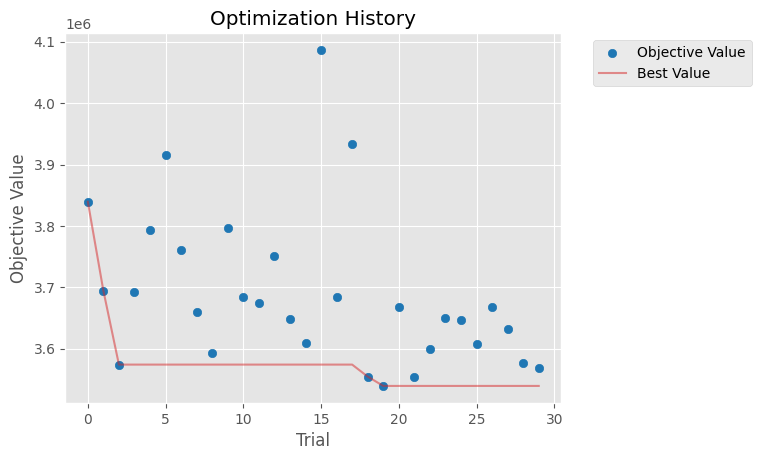

 –õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã: {'iterations': 916, 'depth': 4, 'learning_rate': 0.1104653452300219, 'l2_leaf_reg': 6.6795576678732145, 'random_strength': 0.0046868309173475975, 'bootstrap_type': 'Bernoulli', 'subsample': 0.607635126463493}
 –õ—É—á—à–µ–µ RMSE: 3539421.1179592465


In [12]:


def objective(trial, X_train, y_train):

    params = {
        "iterations": trial.suggest_int("iterations", 300, 1000),
        "depth": trial.suggest_int("depth", 3, 8),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log = True),
        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 0.1, 10.0, log=True),
        "random_strength": trial.suggest_float("random_strength", 1e-9, 10.0, log=True),
        "bootstrap_type": trial.suggest_categorical("bootstrap_type", ["Bernoulli"]),
        "loss_function": "RMSE",
        "eval_metric": "RMSE",
        "verbose": 0,
        "random_state": random_state,
        "cat_features": cat_features,
        "allow_writing_files": False, 
        "subsample": trial.suggest_float("subsample", 0.5, 1)
    }

    cv_data = cv(
            Pool(X_train, y_train, cat_features=cat_features),
            params,
            fold_count=3,
            verbose=False,
            plot=True,
            early_stopping_rounds=30    #–µ—Å–ª–∏ –º–µ—Ç—Ä–∏–∫–∞ –Ω–µ —É–ª—É—á—à–∞–µ—Ç—Å—è, —Ç–æ —á–µ—Ä–µ–∑ 30 —à–∞–≥–æ–≤ –æ—Å—Ç–Ω–æ–≤–∏—Ç—Å—è
            
        )
    
    # –í–æ–∑–≤—Ä–∞—â–∞–µ–º –º–∏–Ω–∏–º–∞–ª—å–Ω–æ–µ RMSE
    return cv_data['test-RMSE-mean'].min()

def optimize_catboost(X_train, y_train, n_trials=30):
    study = optuna.create_study(study_name = 'Cat_boost_optuna',direction='minimize')
    study.optimize(lambda trial: objective(trial, X_train, y_train), n_trials=n_trials, n_jobs=-1)

    print("Best trial:", study.best_trial.params) 

    plot_optimization_history(study)
    return study

def plot_optimization_history(study):
    optuna.visualization.matplotlib.plot_optimization_history(study)
    plt.title("Optimization History")
    plt.show()

    

# –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –∏ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π
X_train, X_test, y_train, y_test = train_test_split(
    df[features], df[TARGET], test_size=0.2, random_state=random_state)

# –û–ø—Ç–∏–º–∏–∑–∞—Ü–∏—è –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤
study = optimize_catboost(X_train, y_train)

#  –õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –∏ –º–µ—Ç—Ä–∏–∫–∞
print(" –õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã:", study.best_params)
print(" –õ—É—á—à–µ–µ RMSE:", study.best_value)


In [ ]:
import plotly.graph_objects as go

# –ò–∑–≤–ª–µ–∫–∞–µ–º –∏—Å—Ç–æ—Ä–∏—é –∑–Ω–∞—á–µ–Ω–∏–π
trials = study.trials_dataframe()
trials = trials[trials["state"] == "COMPLETE"]

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=trials["number"],
    y=trials["value"],
    mode="lines+markers",
    name="RMSE per trial"
))

fig.update_layout(
    title=" –ò—Å—Ç–æ—Ä–∏—è –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–∏ (Optuna)",
    xaxis_title="–ù–æ–º–µ—Ä –∏—Ç–µ—Ä–∞—Ü–∏–∏ (trial)",
    yaxis_title="RMSE",
    height=400,
    width=800
)

fig.show()


In [13]:
best_params = study.best_params
best_model = CatBoostRegressor(**best_params)
best_model.fit(X_train, y_train, cat_features=cat_features)
y_pred_best = best_model.predict(X_test)
mae_best = mean_absolute_error(y_test, y_pred_best)
rmse_best = root_mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)
mape_best = np.mean(np.abs((y_test - y_pred_best) / y_test)) * 100

print(f" –£–ª—É—á—à–µ–Ω—ã–π RMSE: {rmse_best:.2f}")
print(f" –£–ª—É—á—à–µ–Ω—ã–π R¬≤: {r2_best:.4f}")
print(f" –£–ª—É—á—à–µ–Ω—ã–π MAE: {mae_best:.4f}")


0:	learn: 7846090.9471379	total: 19.5ms	remaining: 17.9s
1:	learn: 7354164.0181974	total: 36.4ms	remaining: 16.6s
2:	learn: 6941181.2923899	total: 56.8ms	remaining: 17.3s
3:	learn: 6589417.9702061	total: 78.4ms	remaining: 17.9s
4:	learn: 6264464.9052619	total: 97.1ms	remaining: 17.7s
5:	learn: 6003318.6177632	total: 111ms	remaining: 16.8s
6:	learn: 5753943.5242946	total: 129ms	remaining: 16.7s
7:	learn: 5534403.5246615	total: 147ms	remaining: 16.7s
8:	learn: 5345491.3430042	total: 172ms	remaining: 17.3s
9:	learn: 5162068.3639080	total: 197ms	remaining: 17.8s
10:	learn: 4968970.8671599	total: 218ms	remaining: 17.9s
11:	learn: 4811101.9669217	total: 239ms	remaining: 18s
12:	learn: 4680768.7870888	total: 266ms	remaining: 18.5s
13:	learn: 4560206.8018360	total: 288ms	remaining: 18.6s
14:	learn: 4427923.2366343	total: 306ms	remaining: 18.4s
15:	learn: 4320767.5851843	total: 327ms	remaining: 18.4s
16:	learn: 4216472.6420222	total: 346ms	remaining: 18.3s
17:	learn: 4124119.2882556	total: 366m

In [14]:
print(f" –£–ª—É—á—à–µ–Ω—ã–π RMSE: {rmse_best:.2f}")
print(f" –£–ª—É—á—à–µ–Ω—ã–π R¬≤: {r2_best:.4f}")
print(f" –£–ª—É—á—à–µ–Ω—ã–π MAE: {mae_best:.4f}")


 –£–ª—É—á—à–µ–Ω—ã–π RMSE: 3556774.02
 –£–ª—É—á—à–µ–Ω—ã–π R¬≤: 0.8429
 –£–ª—É—á—à–µ–Ω—ã–π MAE: 2361786.0767


In [15]:
final_model = CatBoostRegressor(cat_features =cat_features, verbose=0,**best_params)
final_model.fit(df.drop(TARGET, axis=1), df[TARGET])

In [16]:
joblib.dump(final_model, 'property_model.pkl')

['property_model.pkl']

## –í—ã–≤–æ–¥—ã

- –ú–æ–¥–µ–ª—å `CatBoostRegressor` –ø–æ–∫–∞–∑–∞–ª–∞ –≤—ã—Å–æ–∫—É—é —Ç–æ—á–Ω–æ—Å—Ç—å –Ω–∞ –æ—Ç–ª–æ–∂–µ–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ (R¬≤ ‚âà 0.84).
- –ü—Ä–µ–¥–≤–∞—Ä–∏—Ç–µ–ª—å–Ω–∞—è –æ—á–∏—Å—Ç–∫–∞ –≤—ã–±—Ä–æ—Å–æ–≤, –æ—Ç–±–æ—Ä –∏ –∫–æ–Ω—Å—Ç—Ä—É–∏—Ä–æ–≤–∞–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ —É–ª—É—á—à–∏–ª–∏ –∫–∞—á–µ—Å—Ç–≤–æ –º–æ–¥–µ–ª–∏.
- –ò—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω hold-out –ø–æ–¥—Ö–æ–¥. –î–ª—è –ø–æ–≤—ã—à–µ–Ω–∏—è —Å—Ç–∞–±–∏–ª—å–Ω–æ—Å—Ç–∏ –ø—Ä–∏–º–µ–Ω–µ–Ω–∞ –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏—è.
- –ü–æ–ª—É—á–µ–Ω–Ω–∞—è –º–æ–¥–µ–ª—å –º–æ–∂–µ—Ç –±—ã—Ç—å –ø—Ä–∏–º–µ–Ω–µ–Ω–∞ –¥–ª—è –æ—Ü–µ–Ω–∫–∏ —Ä—ã–Ω–æ—á–Ω–æ–π —Å—Ç–æ–∏–º–æ—Å—Ç–∏ –∫–≤–∞—Ä—Ç–∏—Ä—ã –ø–æ –≤—Ö–æ–¥–Ω—ã–º –ø—Ä–∏–∑–Ω–∞–∫–∞–º.


<!-- from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from catboost import CatBoostRegressor
import numpy as np
import pandas as pd

df = pd.read_csv("avito_clean_final.csv")  # –ø—É—Ç—å –∫ —Ç–≤–æ–µ–º—É —Ñ–∞–π–ª—É
TARGET = "–¶–µ–Ω–∞"
features = df.drop(columns=[TARGET]).columns.tolist()
cat_features = df[features].select_dtypes(include=["object"]).columns.tolist()

X_train, X_test, y_train, y_test = train_test_split(df[features], df[TARGET], test_size=0.2, random_state=42)

def evaluate_model(X_tr, X_te, y_tr, y_te, cat_feats, log_target=False, label=""):
    if log_target:
        y_tr_log = np.log1p(y_tr)
        model = CatBoostRegressor(verbose=0, random_state=42, cat_features=cat_feats)
        model.fit(X_tr, y_tr_log)
        y_pred = np.expm1(model.predict(X_te))
    else:
        model = CatBoostRegressor(verbose=0, random_state=42, cat_features=cat_feats)
        model.fit(X_tr, y_tr)
        y_pred = model.predict(X_te)

    rmse = mean_squared_error(y_te, y_pred, squared=False)
    r2 = r2_score(y_te, y_pred)
    mape = np.mean(np.abs((y_te - y_pred) / np.clip(y_te, 1e-6, None))) * 100

    print(f"üìä {label}")
    print(f"‚úÖ RMSE: {rmse:.2f}")
    print(f"‚úÖ R¬≤: {r2:.4f}")
    print(f"‚úÖ MAPE: {mape:.2f}%")
    print("-" * 40)
    return model, y_pred

model_raw, y_pred_raw = evaluate_model(X_train, X_test, y_train, y_test, cat_features, log_target=False, label="Raw Target")
model_log, y_pred_log = evaluate_model(X_train, X_test, y_train, y_test, cat_features, log_target=True, label="Log-Transformed Target") -->
